# Part 1: Fancy indexing, views and copies and sorting

In [154]:
import numpy as np

# 1.1. Fancy indexing

You know already how to access single items in an array and how to slice an array. 
For example for the following array ```a```


In [155]:
a = np.arange(12).reshape((4,3))
print(a)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [156]:
# to get a single element you would do...

# to get a *slice* of the array you could do...


There is another way of indexing: when you pass multiple lists. 
They are interpreted as **coordinates to look up**. This is *fancy-indexing*.

In [157]:
# I want two elements: first row, second column, and  second row, third column



Another example

In [158]:
a = np.array(list("ABCDEFGHIJKLMNOPQRSTUVWXYZ1234")).reshape(5,6)
a

array([['A', 'B', 'C', 'D', 'E', 'F'],
       ['G', 'H', 'I', 'J', 'K', 'L'],
       ['M', 'N', 'O', 'P', 'Q', 'R'],
       ['S', 'T', 'U', 'V', 'W', 'X'],
       ['Y', 'Z', '1', '2', '3', '4']], dtype='<U1')

In [159]:
# print OMG


<div>
<img src="imgs/fancy_indexing_lookup.png" width="800" align='center'/>
</div>

In [160]:
rows = np.array([[2, 2, 1], [3, 2, 3]])
cols = np.array([[2, 0, 0], [4, 2, 4]])
print(rows)
print()
print(cols)
print()
print(a[rows, cols])

[[2 2 1]
 [3 2 3]]

[[2 0 0]
 [4 2 4]]

[['O' 'M' 'G']
 ['W' 'O' 'W']]


### You can also combine fancy indexing with regular indexing or slicing

In [161]:
print(a)
print()
# write CAB (all in first row)

# get 1st to 3rd rows, last and first columns 



[['A' 'B' 'C' 'D' 'E' 'F']
 ['G' 'H' 'I' 'J' 'K' 'L']
 ['M' 'N' 'O' 'P' 'Q' 'R']
 ['S' 'T' 'U' 'V' 'W' 'X']
 ['Y' 'Z' '1' '2' '3' '4']]



### Fancy indexing also works with boolean arrays

In this way you can 'mask' the array, selecting only a subset for which a condition is true.

In [162]:
a = np.arange(12).reshape(4,3)
print(a)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [163]:
# select elements greater or equal than 5 


# type of indexing array


In [164]:
# print values from a >= 5


### Alternative: ```where``` argument of universal functions (mean, sum, etc...) 

They will operate only on the array where the array is ```True```

In [165]:
# sum elements with boolean indexing


In [166]:
# sum elements with where argument


# 1.2 Views and Copies: an important distinction!


**View**

- accessing the array without changing the databuffer 
- **regular indexing** and **slicing** give views
- *in-place* operations can be done in views


**Copy**
- when a new array is created by duplicating the data buffer as well as the array metadata
- **fancy indexing** give always copies
- a copy can be forced by method **.copy()**

How to know? with ```base```

In [167]:
a = np.arange(1,6)
print(a)

# create slice of a and print its base



[1 2 3 4 5]


In [168]:
# create a copy of a and print its base


As a copy is a different array in memory, modifiying it will *not* change the base array

In [169]:
a = np.arange(1, 6)
print('a:', a)

#  create a copy


a: [1 2 3 4 5]


In [170]:
# change an element in the copy, print original array


The same operation with a *view*, however, will carry the change 

In [171]:
# do a view and change an element in the view


**Take-away**: you **do** need to know if you are using a **view** or a **copy**, particularly when you are operating on the array **in-place**

### 1.2.1 Strides - why some indexing gives copies and others views?

- how does numpy arrange data in memory? - When you create an array, numpy allocates certain memory that depends on the type you choose

In [172]:
a = np.arange(9).reshape(3,3)
print(a)
a.dtype

[[0 1 2]
 [3 4 5]
 [6 7 8]]


dtype('int64')

In [173]:
a.itemsize

8

In this example the array has 8 bytes allocated per item.

Memory is *linear*, that means, the 2-D array will look in memory something like this (blue boxes) 

![memory.png](imgs/memory.png)

However, the user 'sees' the array in 2D (green boxes).

How does numpy accomplishes this? By defining ```strides```.


In [174]:
a.strides

(24, 8)

Strides tell you by how many bytes you should move in memory when moving one step in that dimension.

![strides.png](imgs/strides.png)

To go from the first item in the first row to the first item in the second row, you need to move (3*8) 24 bytes. To move from the column-wise, you just need to move 8 bytes.

**Views** are created when you use other strides to read your data. Slicing and regular indexing allows that, as you know how many byte steps you need to take to get the data.

**Fancy indexing** does not allow that, because the data you are asking **cannot** be obtained by just changing the strides. Thus, numpy need to make a **copy** of it in memory.

Now, you can change the strides of an array at will.

In [175]:
a.strides=(8,24)
a

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

 But be careful! Changing the strides to something non-sensical will also **give you non-sense**. And numpy will not complain. 

In [176]:
a.strides=(8, 9)

# 1.3 Sorting

Sorting is implemented in numpy by the function ```np.sort```. Default is the *quicksort* algorith, a very efficient one.

In [177]:
a = np.random.randint(1, 10, 5)
print(a)

s = np.sort(a)
print(s)

a.sort()
print(a)

[7 3 4 7 9]
[3 4 7 7 9]
[3 4 7 7 9]


```np.sort()``` returns a sorted array

```.sort()``` makes the sorting *in-place*.

if you need to sort descending, simply use ```.flip()``` after sorting. Or something we learned in slicing part?

In [178]:
a = np.random.randint(1, 10, 5)
print(a)

r = np.sort(a)
print(np.flip(r))


[2 8 5 4 2]
[8 5 4 2 2]


Similarly to ```sort```, ```argsort``` gives you the *indices* that will sort the array

In [179]:
a = np.array([0,9,4,7,1])
print('a:', a)
print()

i = np.argsort(a)
print('i:', i)
print()

print(a[i]) # with fancy indexing

a: [0 9 4 7 1]

i: [0 4 2 3 1]

[0 1 4 7 9]


```axis``` argument allows you to sort an array according to one dimension

In [180]:
a = np.random.randint(1, 15, (3,3))
a

array([[13,  7, 10],
       [ 5,  8, 13],
       [ 7, 14,  8]])

In [181]:
np.sort(a)

array([[ 7, 10, 13],
       [ 5,  8, 13],
       [ 7,  8, 14]])

In [182]:
np.sort(a, axis=0)

array([[ 5,  7,  8],
       [ 7,  8, 10],
       [13, 14, 13]])

In [183]:
np.sort(a, axis=1)

array([[ 7, 10, 13],
       [ 5,  8, 13],
       [ 7,  8, 14]])

Notice that by sorting this way the rows or columns are treated independently, so their relationship is lost!

# Exercises on indexing, views/copies and sorting


### Exercise 1: indexing, dimensionality of the output, view or copy?

Look at the following code examples and before running it, try to answer for each case: \
(1) what is the dimensionality of v? \
(2) is v a view or a copy?

In [184]:
a = np.ones((5,5,5))
a.shape

(5, 5, 5)

In [185]:
# Ex. 1.1
v = a[1, ::2, ::2]

# answers:
# dimensions = 2
# copy / view = view

print(v)
v.base

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]])

In [186]:
# Ex. 1.2
v = a[2,:]

# answers:
# dimensions = 2
# view / copy = view
print(v)
v.base

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]])

In [187]:
# Ex. 1.3
v = a[[0, 1],:]

# answers:
# dimensions = 3
# view / copy = copy
print(v)
v.base

[[[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]]


In [189]:
# Ex. 1.4
v = a[[2,3], [2,3]]

# answers:
# dimensions = 2
# view / copy = copy
print(v.shape)
print(v.base)

(2, 5)
None


### Exercise 2 - visualize indexing

Recreate the following plots using the following procedure. 
- Make an array containing only zeros. That will be your 'canvas'. 
- Then change the values of some of the elements to 1. 
- Then plot using `plt.matshow()`.

![Alt text](imgs/patterns.png)

In [141]:
# Make sure that plots are displayed in the notebook
%matplotlib inline
from matplotlib import pyplot as plt # plotting library

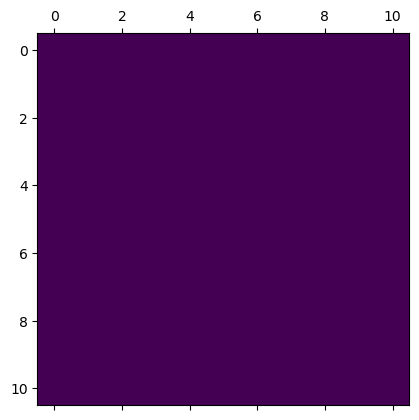

In [142]:
# let's get you started
e1 = np.zeros((11,11))
plt.matshow(e1) #plotting the canvas

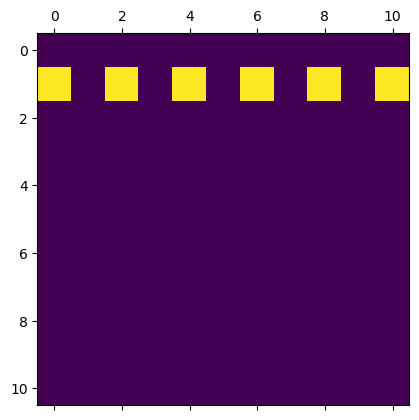

In [143]:
# solution cell
e2 = np.zeros((11,11))
e2[1, ::2] = 1
plt.matshow(e2)

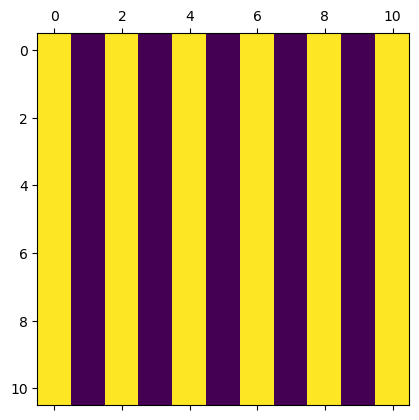

In [144]:
# solution cell
e3 = np.zeros((11,11))
e3[:, ::2] = 1
plt.matshow(e3)

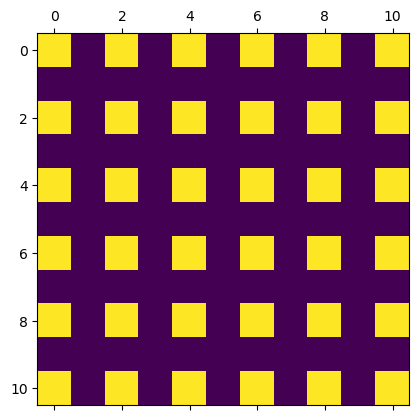

In [145]:
# solution cell
e3 = np.zeros((11,11))
e3[::2, ::2] = 1
plt.matshow(e3)

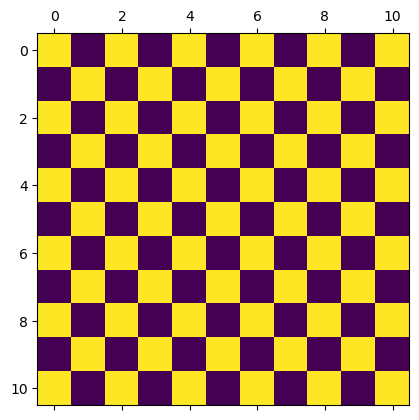

In [146]:
# solution cell
e4 = np.zeros((11,11))
e4 = e4.reshape((e4.size,))
e4[::2] = 1
e4 = e4.reshape((11,11))
plt.matshow(e4)

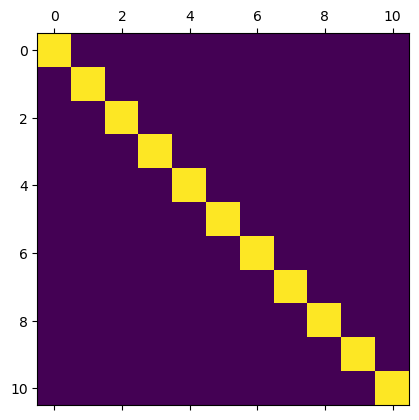

In [147]:
# solution cell
e5 = np.zeros((11,11))
e5[np.arange(11), np.arange(11)] = 1
plt.matshow(e5)

### Exercise 3: sorting on a view or on a copy?

You start with the following 3x3 matrix ```m```

In [148]:
m = np.array([[6,2,3], [1,7,2], [7,6,5]])
m 

array([[6, 2, 3],
       [1, 7, 2],
       [7, 6, 5]])

3.1. Sort only the last row, ascending. Do this *in-place*.

In [152]:
m[-1,:] = np.sort(m[-1,:])
print(m)
m.base

[[6 2 3]
 [1 7 2]
 [5 6 7]]


Now sort the first and second columns (ascending). Try two ways:
- using fancy indexing
- *in place*, using regular indices or slicing

is there a difference? why?

### (Optional) Exercise 4: create a circular mask 

Create a 100\*100 grid and create a circular mask centered in the middle, that is, a boolean array with values```True``` only in the middle of a circle of radius ```r=20```. 

In an x–y Cartesian coordinate system, the circle with centre coordinates (a, b) and radius r is the set of all points (x, y) such that $(x-a)^2 + (y-b)^2 = r^2$

In [38]:
# solution cell


# Sources + other resources


ASPP Bilbao 2022 - Lisa Schwetlick & Aina Frau-Pascual
https://github.com/ASPP/2022-bilbao-advanced-numpy


Scipy lecture notes, 2022.1
- Basic Numpy: http://scipy-lectures.org/intro/numpy/index.html
- Advanced Numpy: http://scipy-lectures.org/advanced/advanced_numpy/index.html

Numpy chapter in "Python Data Science Handbook"
https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html



Further resources on strides: 
- https://scipy-lectures.org/advanced/advanced_numpy/#indexing-scheme-strides
- https://ajcr.net/stride-guide-part-1/
